In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn import linear_model
import random
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor,\
                             RandomForestRegressor, AdaBoostRegressor

train_filename = "train.csv"
# test_filename = "test.csv"

def load_data(fname):
    df = pd.DataFrame.from_csv(fname, index_col=None)    
    return df    

%matplotlib inline

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_colwidth', 65)  # default: 50

In [3]:
print 'Loading challenge...',
train = load_data(train_filename)
train = train.dropna()
print 'done.'

Loading challenge... done.


In [5]:
train.question1 = train.question1.apply(lambda x: x.lower())
train.question2 = train.question2.apply(lambda x: x.lower())

In [159]:
train.info()
train[train.is_duplicate==1].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393348 entries, 0 to 404289
Data columns (total 6 columns):
id              393348 non-null int64
qid1            393348 non-null int64
qid2            393348 non-null int64
question1       393348 non-null object
question2       393348 non-null object
is_duplicate    393348 non-null int64
dtypes: int64(4), object(2)
memory usage: 21.0+ MB


,id,qid1,qid2,question1,question2,is_duplicate
5,5,11,12,astrology: i am a capricorn sun cap moon and cap rising...wha...,"i'm a triple capricorn (sun, moon and ascendant in capricorn)...",1
7,7,15,16,how can i be a good geologist?,what should i do to be a great geologist?,1
11,11,23,24,how do i read and find my youtube comments?,how can i see all my youtube comments?,1
12,12,25,26,what can make physics easy to learn?,how can you make physics easy to learn?,1
13,13,27,28,what was your first sexual experience like?,what was your first sexual experience?,1


In [150]:
t = train.iloc[np.random.choice(range(train.shape[0]), size=50)]


In [156]:
sum([0, 0.7, 1, 1, 1, 0.8, 0, 1, 0, 1])
t.iloc[:10].is_duplicate

234627    0
123770    1
106921    1
9620      0
193828    1
273094    0
351451    0
330733    1
371340    0
154892    1
Name: is_duplicate, dtype: int64

In [153]:
for r in range(t.shape[0]):
    print '{}:\n{}\n{}\n'.format(r, t.iloc[r].question1, t.iloc[r].question2)

0:
magazine cover colors 1920?
why are us aircraft carriers getting bigger if air wings are getting smaller?

1:
how do i stop seeing the same question which i am not interested on my quora feed?
how can i stop seeing a question in my feed without downvoting it?

2:
if a modern woman, went back to the devonian days, how long would she survive?
if a modern woman went back to the devonian days, how long would she survive?

3:
i lost my pan card and i want a new one with the old pan number. how should i proceed?
i lost my pan card. is it possible to get it reissued. i have the pan number and a photo of the same. if yes, what is the procedure?

4:
can some be arrested for verbal and emotional abuse?
can someone be arrested for emotional abuse?

5:
can i do mbbs after doing bds and where?
how can i do mbbs after doing bds?

6:
what is at the end of the end?
what is end-to-end strategy?

7:
if a dnr was ignored in the emergency room? and you are now stuck with life support how do you get the

In [10]:
train.is_duplicate.mean()

0.36919967943644133

In [11]:
train[train.is_duplicate==1]

,id,qid1,qid2,question1,question2,is_duplicate
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and cap rising...wha...,"I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn)...",1
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1
15,15,31,32,What would a Trump presidency mean for current international ...,How will a Trump presidency affect the students presently in ...,1
16,16,33,34,What does manipulation mean?,What does manipulation means?,1
18,18,37,38,Why are so many Quora users posting questions that are readil...,Why do people ask Quora questions which can be answered easil...,1
20,20,41,42,Why do rockets look white?,Why are rockets and boosters painted white?,1
29,29,59,60,How should I prepare for CA final law?,How one should know that he/she completely prepare for CA fin...,1


In [26]:
prev_max_colwidth =  pd.get_option('display.max_colwidth', -1)
pd.set_option('display.max_colwidth', -1)
print train.loc[382534]
pd.set_option('display.max_colwidth', prev_max_colwidth)

id              382534                                                                                                                                            
qid1            225809                                                                                                                                            
qid2            266281                                                                                                                                            
question1       How do you solve the following recurrence using substitution method? [math]T(n) =T\left (\left\lfloor\frac {n} {4} \right\rfloor\right) +n [/math]
question2       How do you solve this recurrence [math]T(n)=T\left(\left\lfloor\frac{n}{4}\right\rfloor\right)+n [/math] by substitution method?                  
is_duplicate    1                                                                                                                                                 
Name: 382534, dtype: o

In [32]:
train[train.question1.apply(lambda x:'[math]' in x)].shape

(460, 6)

In [34]:
print train[train.question1.apply(lambda x:'[math]' in x)].is_duplicate.mean()
print train.is_duplicate.mean()

0.0630434782609
0.369199679436


In [15]:
def contains_weird_digit(x):
    if not isinstance(x, basestring):
        return False
    for a in x:
        if not (str.isalnum(a) or str.isspace(a) or a in '!?.,;-()\'":/\\$+=#@%&'):
            return True
    return False
train[train.question1.apply(contains_weird_digit)].shape
#train.question1[:10].apply(lambda q: filter(lambda x:str.isalnum(x) or str.isspace(x), q))

(6030, 6)

In [16]:
train.loc[train.question1.apply(contains_weird_digit) , "question1"] = np.nan
train.loc[train.question2.apply(contains_weird_digit) , "question1"] = np.nan
train.dropna(inplace=True)

In [21]:
import itertools
words_lst_iterator = itertools.chain([''.join(map(lambda x: x if str.isalnum(x) else ' ', q)).split() for q in train.question1])

In [22]:
from collections import Counter
c = Counter(words_lst)
c

Counter({'writings': 1,
         'yellow': 5,
         'four': 7,
         'prefix': 1,
         'spiders': 1,
         'hanging': 1,
         'lolgop': 1,
         'centimeter': 1,
         'gabrielle': 1,
         'increase': 60,
         'eligible': 2,
         'electricity': 4,
         'unanswered': 1,
         'outwit': 1,
         'tingle': 1,
         'hardness': 1,
         'lord': 4,
         'tatkal': 3,
         'sinking': 1,
         'regional': 1,
         'dell': 4,
         'delpo': 1,
         'experimentally': 1,
         'bringing': 1,
         'lumia': 2,
         'differentiated': 1,
         'basics': 1,
         'internally': 1,
         'prize': 3,
         'wooden': 1,
         'unblurred': 1,
         'deferments': 1,
         'reliable': 8,
         'infjs': 1,
         'cloves': 1,
         'charter': 1,
         'specially': 2,
         'tired': 4,
         'euthenesia': 1,
         'bacon': 1,
         'pulse': 1,
         'elections': 13,
         '270': 

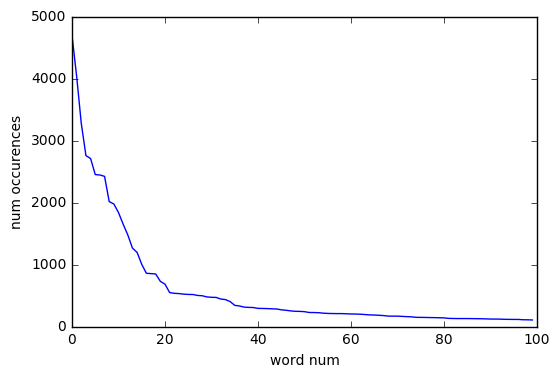

In [37]:
words = sorted(c.keys(), key=lambda x:c[x], reverse=True)
freq = [c[w] for w in words]

plt.plot(freq[:100])
plt.xlabel('word num')
plt.ylabel('num occurences')

In [171]:
train2 = train.iloc[:10000]


In [175]:
train2.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_words,question2_words
0,0,1,2,what is the step by step guide to invest in share market in i...,what is the step by step guide to invest in share market?,0,"[step, step, guide, invest, share, market]","[step, step, guide, invest, share, market]"
1,1,3,4,what is the story of kohinoor (koh-i-noor) diamond?,what would happen if the indian government stole the kohinoor...,0,"[story, kohinoor, koh, noor, diamond]","[happen, government, stole, kohinoor, koh, noor, diamond, back]"
2,2,5,6,how can i increase the speed of my internet connection while ...,how can internet speed be increased by hacking through dns?,0,"[increase, speed, internet, connection, while, using, vpn]","[internet, speed, increased, hacking, through, dns]"
4,4,9,10,"which one dissolve in water quikly sugar, salt, methane and c...",which fish would survive in salt water?,0,"[dissolve, water, quikly, sugar, salt, methane, carbon, di, o...","[fish, survive, salt, water]"
5,5,11,12,astrology: i am a capricorn sun cap moon and cap rising...wha...,"i'm a triple capricorn (sun, moon and ascendant in capricorn)...",1,"[astrology, capricorn, sun, cap, moon, cap, rising, say]","[m, triple, capricorn, sun, moon, ascendant, capricorn, say]"


In [172]:
for n in [1,2]:
    train2['question{}_words'.format(n)] = [''.join(map(lambda x: x if str.isalnum(x) else ' ', q)).split() for q in train2['question{}'.format(n)]]

C:\Users\Dean\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [174]:
for n in [1,2]:
    train2['question{}_words'.format(n)] = train2['question{}_words'.format(n)].apply(lambda x: filter(lambda w: w not in words[:100], x))

C:\Users\Dean\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [176]:
t = train2[train2.question1_words == train2.question2_words]
print t.shape, t.is_duplicate.mean()
t

(612, 8) 0.748366013072


,id,qid1,qid2,question1,question2,is_duplicate,question1_words,question2_words
0,0,1,2,what is the step by step guide to invest in share market in i...,what is the step by step guide to invest in share market?,0,"[step, step, guide, invest, share, market]","[step, step, guide, invest, share, market]"
12,12,25,26,what can make physics easy to learn?,how can you make physics easy to learn?,1,"[physics, easy]","[physics, easy]"
13,13,27,28,what was your first sexual experience like?,what was your first sexual experience?,1,"[sexual, experience]","[sexual, experience]"
41,41,83,84,when can i expect my cognizant confirmation mail?,when can i expect cognizant confirmation mail?,0,"[expect, cognizant, confirmation, mail]","[expect, cognizant, confirmation, mail]"
49,49,99,100,how do i make friends.,how to make friends ?,1,[friends],[friends]
71,71,143,144,what is a narcissistic personality disorder?,what is narcissistic personality disorder?,1,"[narcissistic, personality, disorder]","[narcissistic, personality, disorder]"
72,72,145,146,how i can speak english fluently?,how can i learn to speak english fluently?,1,"[speak, english, fluently]","[speak, english, fluently]"
95,95,191,192,how does 3d printing work?,how do 3d printing work?,1,"[3d, printing]","[3d, printing]"
107,107,215,216,what's the difference between love and pity?,what is the difference between love and pity?,1,"[love, pity]","[love, pity]"
111,111,223,224,is usa the most powerful country of the world?,why is the usa the most powerful country of the world?,0,"[usa, powerful, country]","[usa, powerful, country]"


In [126]:
def similarity1(lst1, lst2, weight_fun = word_weight):
    return (1 + sum(weight_fun(w) for w in intersect(lst1, lst2))) *1./ (1 + sum(weight_fun(w) for w in union(lst1, lst2)))
def similarity2(lst1, lst2, weight_fun = word_weight):
    return (1 + sum(weight_fun(w) for w in intersect(words[100:], intersect(lst1, lst2)))) *1./\
            (1 + sum(weight_fun(w) for w in intersect(words[100:], union(lst1, lst2))))
def similarity3(lst1, lst2):
    return similarity1(lst1, lst2, weight_fun=word_weight2)
def similarity4(lst1, lst2):
    return similarity1(lst1, lst2, weight_fun=word_weight3)
def similarity5(lst1, lst2):
    return similarity1(lst1, lst2, weight_fun=word_weight4)
print similarity1(lst1, lst2)
print similarity2(lst1, lst2)
print similarity3(lst1, lst2)
print similarity4(lst1, lst2)
print similarity5(lst1, lst2)

0.5
0.666666666667
0.526508226691
0.541518356639
0.504857697132


In [215]:
sim_fun_lst = [similarity1, similarity2, similarity3, similarity4]
for sim_fun in sim_fun_lst:
    train2[sim_fun.__name__] = [sim_fun(lst1, lst2) for lst1,lst2 in zip(train2.question1_words, train2.question2_words)]

C:\Users\Dean\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


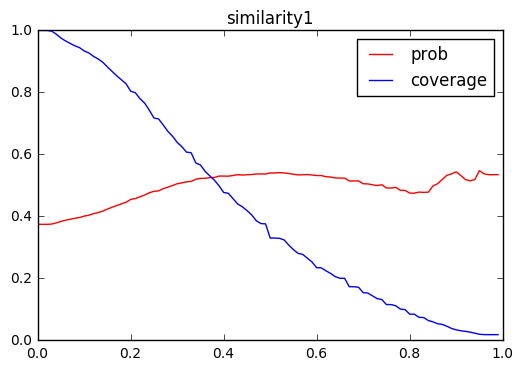

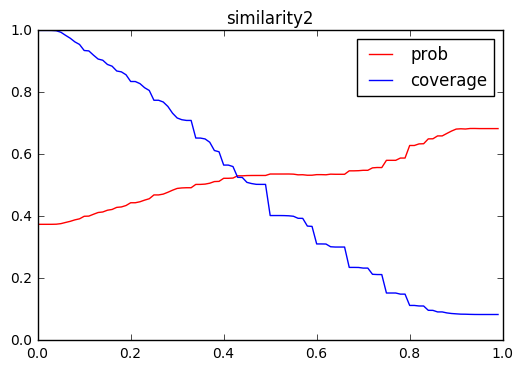

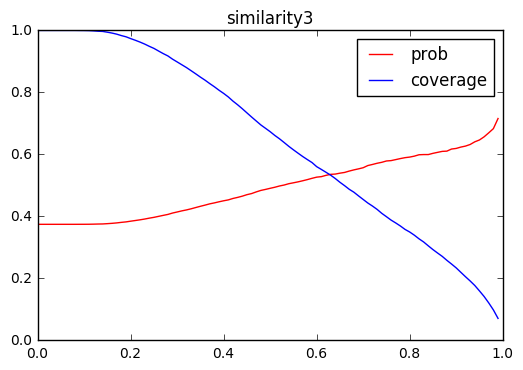

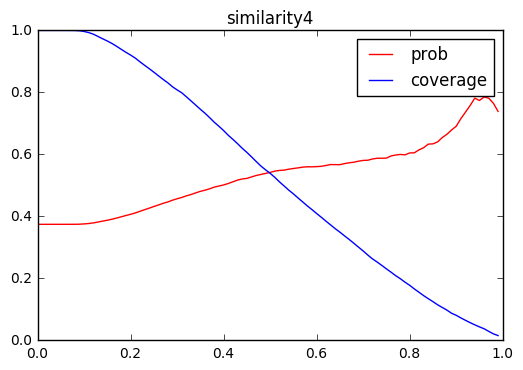

In [137]:
for sim_fun in sim_fun_lst:
    domain = np.arange(0,1,0.01)
    arr = [train2[train2[sim_fun.__name__] > thresh].is_duplicate.mean() for thresh in domain]
    plt.plot(domain, arr, 'r', label='prob')
    plt.plot(domain, [train2[train2[sim_fun.__name__] > thresh].shape[0]*1./train2.shape[0] for thresh in domain], 'b', label='coverage')
    plt.title(sim_fun.__name__)
    plt.legend()
    plt.show()

In [214]:
def intersect(x, y):
    return list(set(filter(set(x).__contains__, y)))
def union(x,y):
    return list(set(lst1).union(lst2))
def word_weight(w):
    return 1
def word_weight2(w):
    return 1./(c[w]+1)
def word_weight3(w):
    return 1./np.sqrt(c[w]+1)
def word_weight4(w):
    return 1./(c[w]+1)**2

lst1 = ['fluent', 'chinese']
lst2 = ['fluent', 'chinese2']
print intersect(lst1, lst2)
print (1 + sum(word_weight(w) for w in intersect(lst1, lst2)))
print (1 + sum(word_weight(w) for w in union(lst1, lst2)))
print (1 + sum(word_weight(w) for w in intersect(lst1, lst2))) *1./ (1 + sum(word_weight(w) for w in union(lst1, lst2)))

['fluent']
2
4
0.5


In [75]:
intersect(lst1)

['fluent', 'chinese2', 'chinese']

In [181]:
different = train[train.is_duplicate == 0]

In [183]:
different.head(20)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in share market in i...,what is the step by step guide to invest in share market?,0
1,1,3,4,what is the story of kohinoor (koh-i-noor) diamond?,what would happen if the indian government stole the kohinoor...,0
2,2,5,6,how can i increase the speed of my internet connection while ...,how can internet speed be increased by hacking through dns?,0
4,4,9,10,"which one dissolve in water quikly sugar, salt, methane and c...",which fish would survive in salt water?,0
6,6,13,14,should i buy tiago?,what keeps childern active and far from phone and video games?,0
9,9,19,20,motorola (company): can i hack my charter motorolla dcx3400?,how do i hack motorola dcx3400 for free internet?,0
10,10,21,22,method to find separation of slits using fresnel biprism?,what are some of the things technicians can tell about the du...,0
14,14,29,30,what are the laws to change your status from a student visa t...,what are the laws to change your status from a student visa t...,0
17,17,35,36,why do girls want to be friends with the guy they reject?,how do guys feel after rejecting a girl?,0
19,19,39,40,which is the best digital marketing institution in banglore?,which is the best digital marketing institute in pune?,0


In [216]:
train_set = train2.iloc[:5000]
valid_set = train2.iloc[5000:]

In [205]:
def logloss(yhat, y):
    return -np.mean(y*np.log(yhat) + (1-y)*np.log(1-yhat))
def baseline_score(train_df, test_df):
    p = train_df.is_duplicate.mean()
    print 'p=',p
    return logloss(np.array([p]*test_df.shape[0]), test_df.is_duplicate)

In [217]:
baseline_score(train_set, valid_set)

p= 0.386


0.6563423761483816

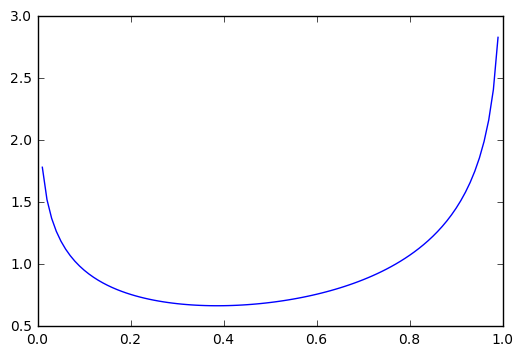

In [218]:
f = lambda x: logloss(np.array([x]*train_set.shape[0]), train_set.is_duplicate)
x = np.arange(0,1,0.01)
y = [f(a) for a in x]
plt.plot(x,y)

In [238]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(verbose=5, n_estimators=70)
clf.fit(train_set[['similarity1','similarity2','similarity3','similarity4']], train_set.is_duplicate)

      Iter       Train Loss   Remaining Time 
         1           1.2920            0.35s
         2           1.2576            0.27s
         3           1.2290            0.25s
         4           1.2048            0.23s
         5           1.1843            0.22s
         6           1.1669            0.21s
         7           1.1517            0.21s
         8           1.1389            0.20s
         9           1.1275            0.20s
        10           1.1178            0.19s
        11           1.1092            0.19s
        12           1.1018            0.19s
        13           1.0956            0.19s
        14           1.0898            0.20s
        15           1.0847            0.20s
        16           1.0803            0.20s
        17           1.0768            0.20s
        18           1.0732            0.19s
        19           1.0696            0.19s
        20           1.0672            0.18s
        21           1.0643            0.18s
        2

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              presort='auto', random_state=None, subsample=1.0, verbose=5,
              warm_start=False)

In [231]:
yhat = clf.predict_proba(valid_set[['similarity1','similarity2']])[:,1]
print logloss(yhat, valid_set.is_duplicate)

0.53869892799


In [239]:
yhat = clf.predict_proba(valid_set[['similarity1','similarity2', 'similarity3', 'similarity4']])[:,1]
print logloss(yhat, valid_set.is_duplicate)

0.535885679427
